### In this notebook , I will implement KNN algorithm from scratch and then visualize the results of my predictions 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
def euclidean_distance(point_1,point_2):
    return np.sqrt(np.sum(np.square(np.array(point_1)-np.array(point_2))))

In [5]:
euclidean_distance([1,2,3],[3,2,4])

2.23606797749979

In [10]:
sorted([(1,4),(0,5),(-2,10)])

[(-2, 10), (0, 5), (1, 4)]

In [85]:
arr = [(1,1),(0,0),(-2,1),(-2,2),(-2,2),(-2,0)]
arr = [x[1] for x in arr]
res = Counter(arr).most_common()
print(res)
res.sort(key=lambda x: x[0])
print(res)

[(1, 2), (0, 2), (2, 2)]
[(0, 2), (1, 2), (2, 2)]


In [108]:
class KNN:
    def __init__(self,k=3):
        self.k=k
        self.points=None
    
    def fit(self,points):
        self.points = points
    
    def predict(self,new_point):
        distances = []
        for category in self.points:
            for point in self.points[category]:
                dist = euclidean_distance(point,new_point)
                distances.append((dist,category))
        
        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result


##### Let's try it out on a small 2d dataset 

In [109]:
points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}

new_point = [3,3]

In [110]:
clf = KNN(2)
clf.fit(points)
clf.predict(new_point)

'blue'

##### Let's visualize the results

C:\Users\001\AppData\Local\Temp\ipykernel_27272\3705415327.py:2: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, color='#000000')


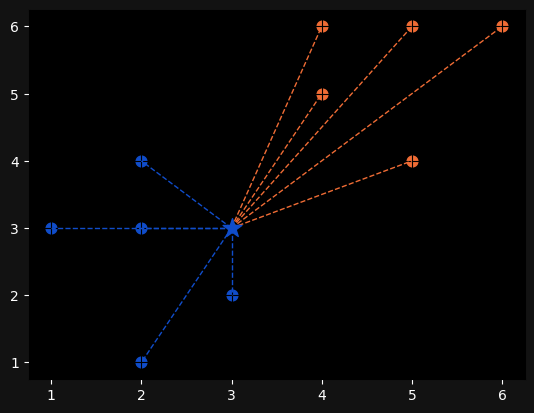

In [111]:
ax = plt.subplot()
ax.grid(False, color='#000000')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()

##### Let's try it out on a small 3d dataset 

In [112]:

points = {'blue': [[2, 4, 3], [1, 3, 5], [2, 3, 1], [3, 2, 3], [2, 1, 6]],
          'orange': [[5, 6, 5], [4, 5, 2], [4, 6, 1], [6, 6, 1], [5, 4, 6], [10, 10, 4]]}

new_point = [3, 3, 4]

clf = KNN(k=3)
clf.fit(points)
print(clf.predict(new_point))

blue


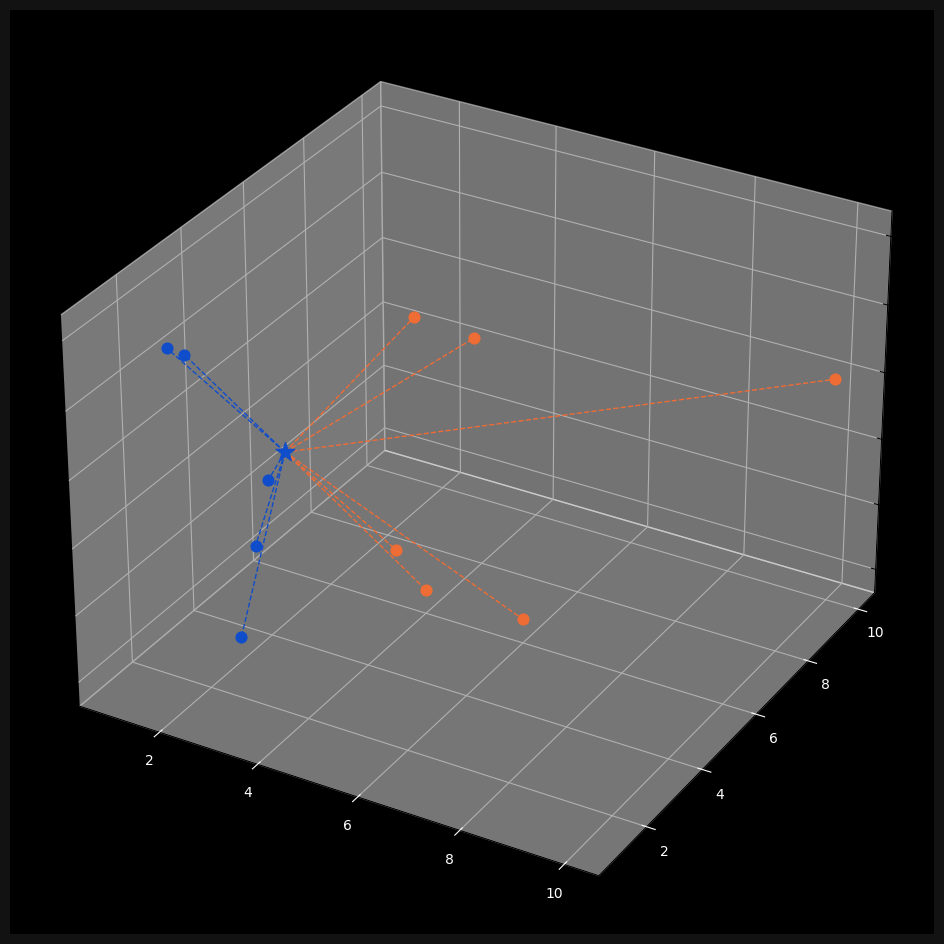

In [113]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.grid(True, color='#323232')

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for point in points['blue']:
    ax.scatter(point[0], point[1], point[2], color='#104DCA', s=60)

for point in points['orange']:
    ax.scatter(point[0], point[1], point[2], color='#EF6C35', s=60)

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], new_point[2], color=color, marker='*', s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#104DCA', linestyle='--', linewidth=1)

for point in points['orange']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], [new_point[2], point[2]], color='#EF6C35', linestyle='--', linewidth=1)

plt.show()

#### Let's compare our knn with the one from scikit learn and see the results

In [114]:
!pip install -U scikit-learn

In [115]:
!pip install pandas

In [116]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
from collections import Counter

In [117]:
iris = load_iris()

In [118]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [119]:
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [120]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [121]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=4)

In [122]:
X_train,y_train

(array([[5.4, 3. , 4.5, 1.5],
        [4.6, 3.2, 1.4, 0.2],
        [6.7, 2.5, 5.8, 1.8],
        [4.9, 3. , 1.4, 0.2],
        [5. , 2.3, 3.3, 1. ],
        [6.7, 3.3, 5.7, 2.5],
        [7.2, 3.2, 6. , 1.8],
        [5.8, 2.6, 4. , 1.2],
        [6.7, 3.1, 4.7, 1.5],
        [5.1, 3.8, 1.6, 0.2],
        [7.7, 3. , 6.1, 2.3],
        [5. , 3.4, 1.5, 0.2],
        [6.7, 3.1, 4.4, 1.4],
        [5.4, 3.7, 1.5, 0.2],
        [6.4, 2.8, 5.6, 2.2],
        [4.3, 3. , 1.1, 0.1],
        [5.7, 4.4, 1.5, 0.4],
        [5.9, 3. , 4.2, 1.5],
        [6.1, 3. , 4.6, 1.4],
        [6.5, 3. , 5.5, 1.8],
        [5.2, 3.5, 1.5, 0.2],
        [5.6, 2.5, 3.9, 1.1],
        [7.7, 2.6, 6.9, 2.3],
        [6.3, 3.4, 5.6, 2.4],
        [6.2, 2.9, 4.3, 1.3],
        [5.7, 2.9, 4.2, 1.3],
        [5. , 3.5, 1.6, 0.6],
        [5.6, 2.9, 3.6, 1.3],
        [6. , 2.2, 5. , 1.5],
        [5.5, 2.6, 4.4, 1.2],
        [4.6, 3.4, 1.4, 0.3],
        [5.6, 3. , 4.1, 1.3],
        [5.1, 3.4, 1.5, 0.2],
        [6

In [123]:
knn_sklearn = KNeighborsClassifier(n_neighbors=4)
knn_sklearn.fit(X_train,y_train)
y_pred = knn_sklearn.predict(X_test)

#### Let's try out my KNN

In [124]:
train_data_preprocessed = {}
for i in range(len(X_train)):
    curr_point = X_train[i]
    target_class = y_train[i]
    if target_class in train_data_preprocessed:
        train_data_preprocessed[target_class].append(curr_point)
    else:
        train_data_preprocessed[target_class] = [curr_point]
train_data_preprocessed

{1: [array([5.4, 3. , 4.5, 1.5]),
  array([5. , 2.3, 3.3, 1. ]),
  array([5.8, 2.6, 4. , 1.2]),
  array([6.7, 3.1, 4.7, 1.5]),
  array([6.7, 3.1, 4.4, 1.4]),
  array([5.9, 3. , 4.2, 1.5]),
  array([6.1, 3. , 4.6, 1.4]),
  array([5.6, 2.5, 3.9, 1.1]),
  array([6.2, 2.9, 4.3, 1.3]),
  array([5.7, 2.9, 4.2, 1.3]),
  array([5.6, 2.9, 3.6, 1.3]),
  array([5.5, 2.6, 4.4, 1.2]),
  array([5.6, 3. , 4.1, 1.3]),
  array([6.4, 2.9, 4.3, 1.3]),
  array([6.7, 3. , 5. , 1.7]),
  array([6. , 3.4, 4.5, 1.6]),
  array([5.5, 2.4, 3.8, 1.1]),
  array([6.5, 2.8, 4.6, 1.5]),
  array([6.3, 2.5, 4.9, 1.5]),
  array([6.4, 3.2, 4.5, 1.5]),
  array([5.5, 2.3, 4. , 1.3]),
  array([5.8, 2.7, 3.9, 1.2]),
  array([6.1, 2.8, 4. , 1.3]),
  array([5.9, 3.2, 4.8, 1.8]),
  array([5.7, 2.8, 4.1, 1.3]),
  array([6.6, 3. , 4.4, 1.4]),
  array([6. , 2.2, 4. , 1. ]),
  array([5.8, 2.7, 4.1, 1. ]),
  array([6.8, 2.8, 4.8, 1.4]),
  array([5.2, 2.7, 3.9, 1.4]),
  array([6.1, 2.8, 4.7, 1.2]),
  array([5.5, 2.5, 4. , 1.3]),
  arr

In [125]:
my_knn = KNN(4)
my_knn.fit(train_data_preprocessed)
my_y_preds = []
for test_point in X_test:
    my_y_preds.append(my_knn.predict(test_point))
my_y_preds

[2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2]

In [126]:
my_y_preds==y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#### so my knn produced similar results just like the one from sklearn

In [133]:
k_range = range(1, 40)
my_scores = {}
my_scores_list = []

for k in k_range:
    knn = KNN(k)
    knn.fit(train_data_preprocessed)
    my_y_preds = []
    for test_point in X_test:
        my_y_preds.append(knn.predict(test_point))
    my_scores[k] = metrics.accuracy_score(y_test, np.array(my_y_preds))
    my_scores_list.append(metrics.accuracy_score(y_test, np.array(my_y_preds)))

In [134]:
my_scores_list

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'Testing accuracy')

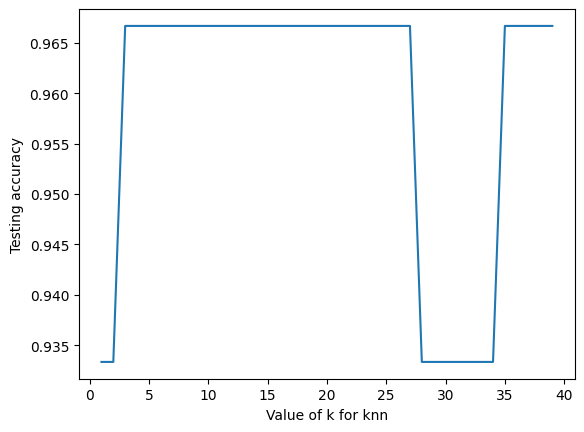

In [135]:
plt.plot(k_range,my_scores_list)
plt.xlabel("Value of k for knn")
plt.ylabel("Testing accuracy")

so lowest optimal value for k is 5 